# OBSOLETE
See `AkBl.ipynb`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set(
    style='ticks',
    font_scale=1.5,
)
sns.set_palette('RdBu', 2)
from rakott.mpl import fig_xlabel, fig_ylabel, fig_panel_labels, greyscale_figure

In [14]:
def phase_plane(x, poly_boundry, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    ax.fill_between(x, poly_boundry, [100]*n)
    ax.fill_between(x, poly_boundry)

    ax.set(
        xlim=(0, 1),
        ylabel='',
#         yscale='log',
        yticks=np.linspace(1, int(np.nanmax(poly_boundry)+1), 5, dtype=int),
        ylim=(1, np.nanmax(poly_boundry)),
    )
    sns.despine(top=True, bottom=True, right=True, left=True)
    return ax

In [15]:
def calc_poly_boundry(ρ, W, w):
    return -np.log(1+ρ*(W-w)/w) / np.log(1+ρ*(w-W))

/Users/yoavram/miniconda3/envs/Milpitas/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


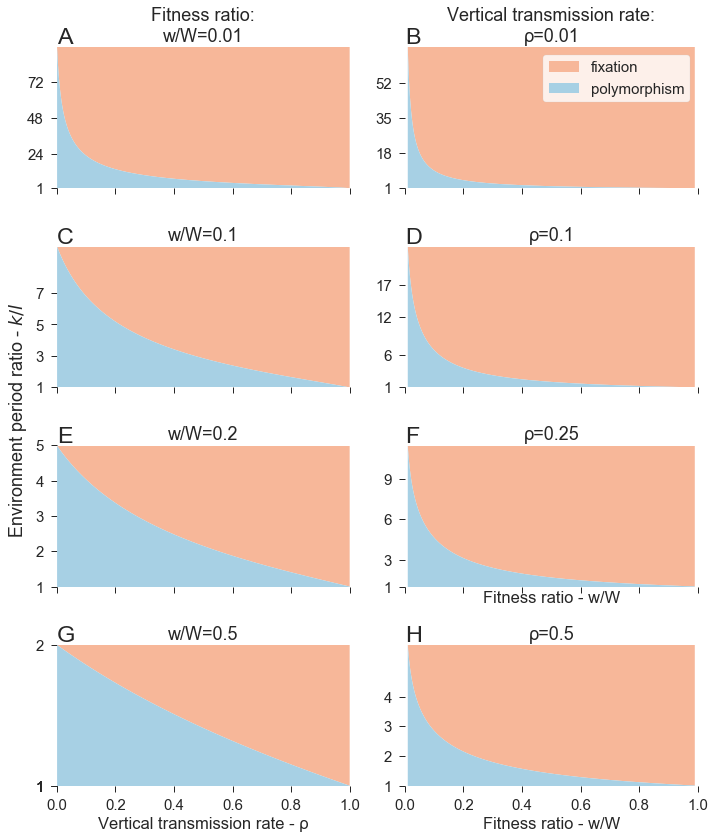

In [17]:
n = 1000
W = 1

fig, axes = plt.subplots(4, 2, squeeze=False, sharex='col', sharey=False, figsize=(10, 12))

ρ = np.linspace(0, 1, n)

w = 0.01
poly_boundry = calc_poly_boundry(ρ, W, w)

phase_plane(ρ, poly_boundry, ax=axes[0,0])
axes[0, 0].set(
    title=('Fitness ratio:\nw/W={}'.format(w/W)),
)

w = 0.1
poly_boundry = calc_poly_boundry(ρ, W, w)

phase_plane(ρ, poly_boundry, ax=axes[1, 0])
axes[1, 0].set(
    title=('w/W={}'.format(w/W)),
)

w = 0.2
poly_boundry = calc_poly_boundry(ρ, W, w)

phase_plane(ρ, poly_boundry, ax=axes[2, 0])
axes[2, 0].set(
    title=('w/W={}'.format(w/W)),
)

w = 0.5
poly_boundry = calc_poly_boundry(ρ, W, w)

phase_plane(ρ, poly_boundry, ax=axes[3, 0])
axes[3, 0].set(
    title=('w/W={}'.format(w/W)),
    xlabel='Vertical transmission rate - ρ',
)

w = np.linspace(0.01, 0.99, n)

ρ = 0.01
poly_boundry = calc_poly_boundry(ρ, W, w)

phase_plane(w, poly_boundry, ax=axes[0, 1])
axes[0, 1].set(
    title=('Vertical transmission rate:\nρ={}'.format(ρ)),
)

ρ = 0.1
poly_boundry = calc_poly_boundry(ρ, W, w)

phase_plane(w, poly_boundry, ax=axes[1, 1])
axes[1, 1].set(
    title=('ρ={}'.format(ρ)),
)

ρ = 0.25
poly_boundry = calc_poly_boundry(ρ, W, w)

phase_plane(w, poly_boundry, ax=axes[2, 1])
axes[2, 1].set(
    title=('ρ={}'.format(ρ)),
    xlabel='Fitness ratio - w/W',
)

ρ = 0.5
poly_boundry = calc_poly_boundry(ρ, W, w)

phase_plane(w, poly_boundry, ax=axes[3, 1])
axes[3, 1].set(
    title=('ρ={}'.format(ρ)),
    xlabel='Fitness ratio - w/W',
)

axes[0, 1].legend(['fixation', 'polymorphism', ], frameon=True, loc='upper right')
ylabel = fig_ylabel(fig, r'Environment period ratio - $k/l$', xcoord=0.03)
fig_panel_labels(axes, xcoord=0, ycoord=1.025)
fig.tight_layout()

fig.savefig('../figures/lk_phase_plane.pdf', dpi=300, bbox_extra_artists=[ylabel], bbox_inches='tight')
fig.savefig('../figures/lk_phase_plane.png', dpi=300, bbox_extra_artists=[ylabel], bbox_inches='tight')
greyscale_figure('../figures/lk_phase_plane.png')